### Using logistic regression to identifying Crops

## Information
- Here, you will use remote sensing data collected from Sentinel-2 satellite to find crops. 
- Algorithms that can identify crops are helpful in accessing land-use changes associated with agriculture
- Sentinel-2 collects data across 13 spectral bands (regions of EM spectrum) as shown below: 
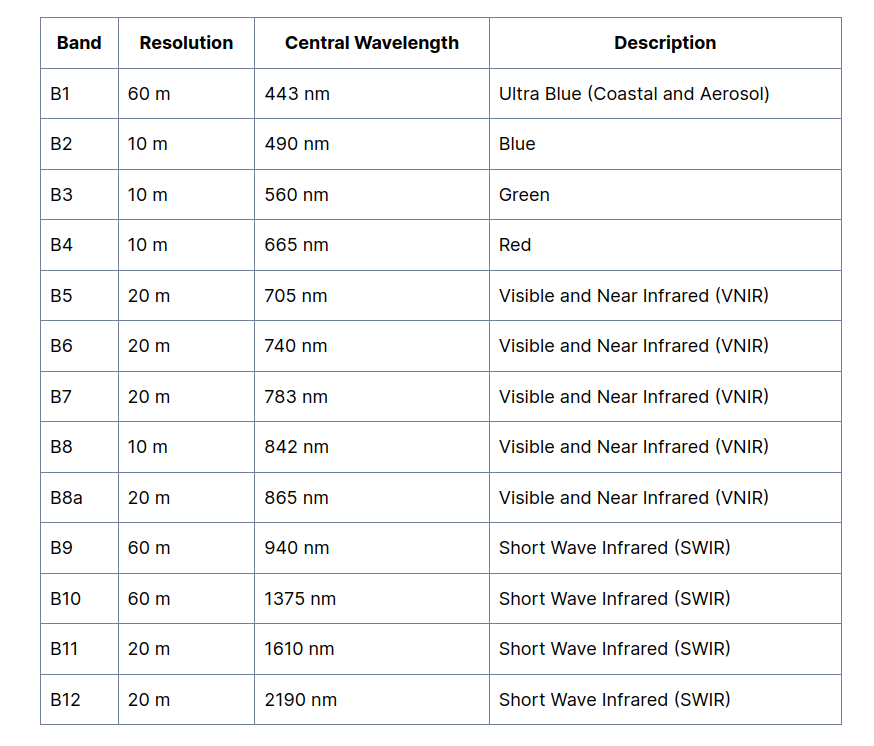
- Some bands are more helpful than others. For example B2-B4 are visible bands, near-IR wavelengths that can be senstiive to chlorophyll and short wave IR are sensitive to water content. 
- Bands such as B1 and B10, however, respond more to clouds and particles in the air and are therefore less useful
- Scientists also created indices for certain purposes. These indices are combinations of values from different bands. For our purposes, the normalized difference vegetation index (NDVI) will be helpful because it is specifically suited to identifying plants. It is calculated as: 
$$ NDVI = (B8 - B4) / (B8 + B4) $$

In [64]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix


### Part 1: 
- We will use data collected from the Togolese Republic (as described in [this paper](https://arxiv.org/pdf/2006.16866.pdf), with data accessed through [this repo](https://github.com/nasaharvest/cropharvest)). 
- The data contains 1290 data points in the training set and 306 in the test set
- Each data point represents one spatial location, and contains all Sentintel-2 bands except B1 and B10 plus the pre-calculated NDVI. 
- Therefore, each data point has 12 features in total. Each point is labeled as containing crops (1) or not (0).   
- Download the npz [here](https://drive.google.com/file/d/14jJCC0srUmoAIWWOESE-s4mWbMq3OrH9/view?usp=sharing) and unpack it as below. 

In [21]:
data = np.load('togo_crops_data.npz')

X_train = data['arr_0'] 
y_train = data['arr_1']
X_test = data['arr_2']
y_test = data['arr_3']

cols = ['B2', 'B3', 'B4','B5','B6','B7','B8','B8A','B9','B11','B12','NDVI']
df = pd.DataFrame(X_train, columns = cols)
df['label'] = y_train
df.head()

,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,NDVI,label
0,-0.735787,-0.691259,-0.062592,-0.106012,-0.065561,-0.192005,-0.590218,-0.637152,-0.663091,-0.580077,-0.713042,0.748443,1
1,-0.735658,-1.120947,-0.060557,-0.066040,0.012154,-0.111543,-0.442255,-0.476305,-0.500743,-0.412356,-0.695105,0.947777,1
2,-0.189159,0.048706,-0.108044,-0.153252,-0.156015,-0.275766,-0.612658,-0.658870,-0.657420,-0.607129,-0.709679,0.527685,1
3,-1.189440,-0.735436,-0.068698,-0.093657,-0.059828,-0.177496,-0.476616,-0.504131,-0.526974,-0.434673,-0.687258,0.768935,1
4,-0.388671,-0.589564,-0.087014,-0.114006,-0.087856,-0.213770,-0.542534,-0.586251,-0.599995,-0.523945,-0.702953,0.701869,1


### Part 2: Initial View of Data
- Plot histograms of the training values of each feature. 
- Specifically, for each feature, make a single plot that contains two histograms: one of the values for locations with crops and one for those without *(1 pt)*.
- Set the bins the same for each *(.5 pt)* and 
- reduce the transparency of each so that both are visible *(.5 pt)*. 
- E.g., they should look something like this: 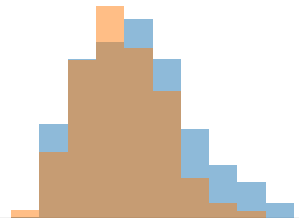

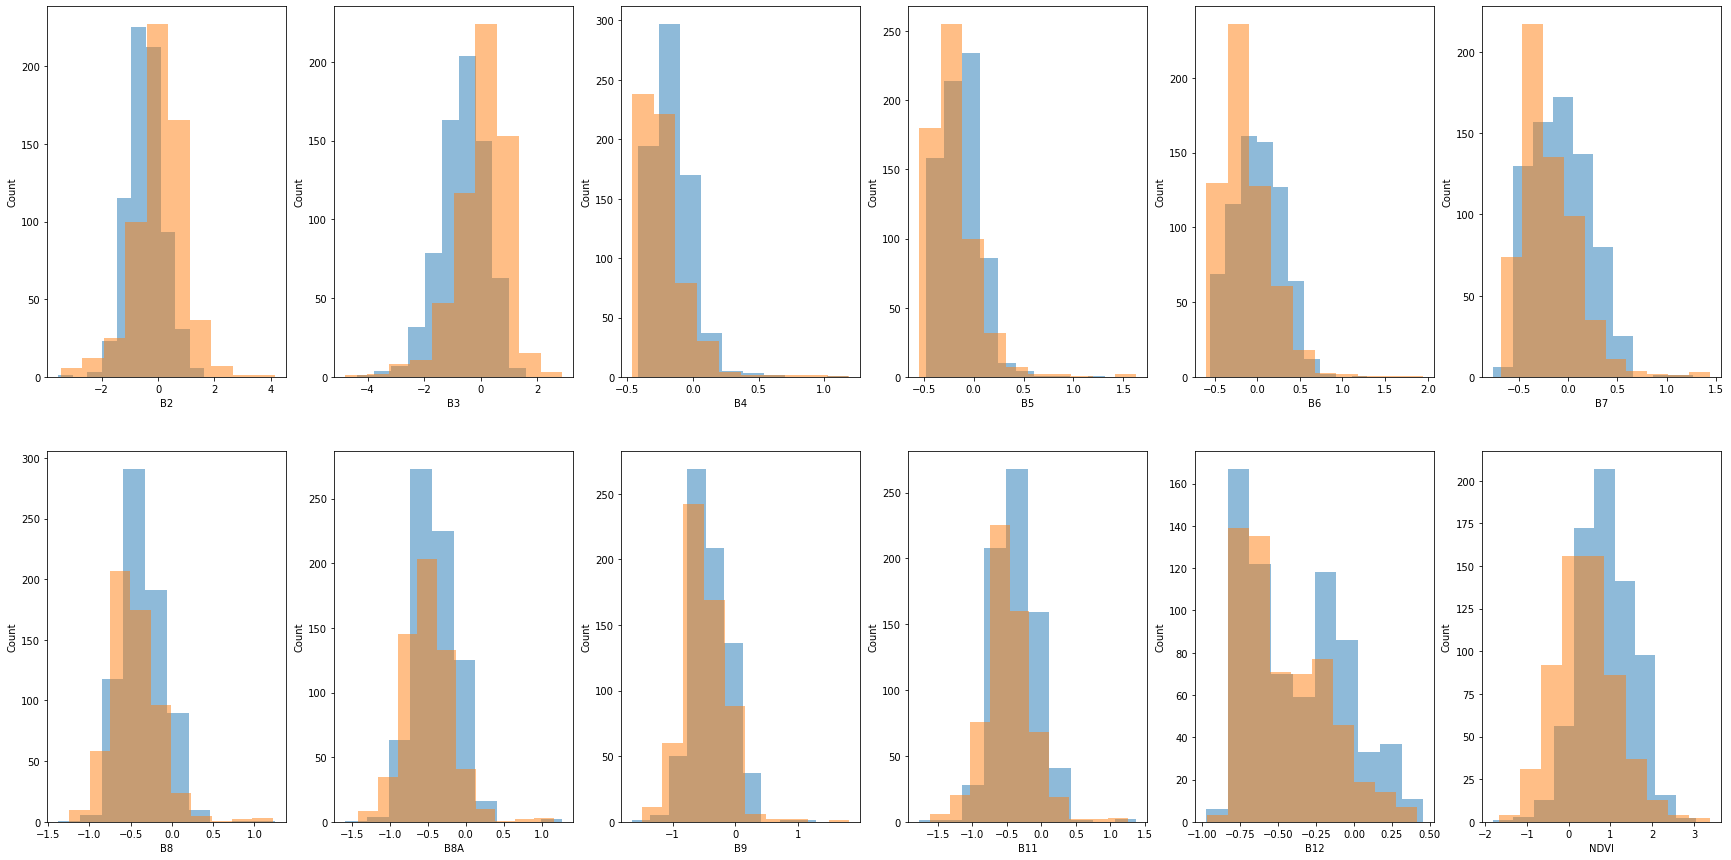

In [57]:
hit = df[df['label']==1]
miss = df[df['label'] ==0]
# (x, y, ax)
fig, ax = plt.subplots(2, 6, figsize=(30, 15))

count = 0
for i in range(2):
    for j in range(6):
        ax[i][j].hist(hit.iloc[:,count], bins = 10, alpha = 0.5)
        ax[i][j].hist(miss.iloc[:,count], bins = 10, alpha = 0.5)
        ax[i][j].set_xlabel(cols[count])
        ax[i][j].set_ylabel('Count')
        count += 1
plt.show()

#### Based on these plots, do you think the first feature would be useful for identifying crops? What about the 8th? *(.5 pt each)*

#### Answer:
The histograms shown represent the label values of "having crops" and "not having crops" over the range of a single feature. The most ideal feature for identifying crops, would then be a feature than can most distinctly separate the two labels. In other words, we are looking for the feature that has the largest difference in distribution from each other or the least amount of overlap. As such the first feature I would choose for identifying crops would be B3 or NVDI. Based on the plots, I can't really tell which is more fit to be the first feature.  

### Part 3: Model
- Train a logistic regression model on the training data to classify each data point as containing crops or not *(1 pt)*. 
- Evaluate the model separately on both the training and test set according to the overall classification accuracy. 
- Because this a binary classification model, we can also use more fine-grained measures of performance such as [precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall). 
- Evaluate the model on these metrics as well *(.5 pt for each metric for training and test - 3 pts total)*. So (3 metrics * model eval on both train and test = 3*2*0.5pts = 3pts)
- So, train on training set and test set. Also, obtain classification accuracy, precision and recall.
- Evaluate on train set
 - accuracy
 - precision
 - recall
- Evalutate on test set
 - accuracy
 - precision
 - recall

In [68]:
# create and fit model
model = LogisticRegression(random_state = 0)
model.fit(X_train, y_train)

# predict on train set and get scores
y_pred_train = model.predict(X_train)
accur = model.score(X_train, y_train)
precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)

print('Eval on training data:')
print('\tAccuracy: ', accur)
print('\tPrecision: ', precision)
print('\tRecall: ', recall)


# predict on test set and get scores
y_pred_test = model.predict(X_test)
accur = model.score(X_test, y_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)

print('Eval on test data:')
print('\tAccuracy: ', accur)
print('\tPrecision: ', precision)
print('\tRecall: ', recall)

confusion = confusion_matrix(y_test, y_pred_test)
print('TN: ', confusion[0][0])
print('FN:',confusion[1][0])
print('TP: ', confusion[1][1])
print('FP: ', confusion[0,1])

Eval on training data:
	Accuracy:  0.7511627906976744
	Precision:  0.7526041666666666
	Recall:  0.8152327221438646
Eval on test data:
	Accuracy:  0.7352941176470589
	Precision:  0.5886524822695035
	Recall:  0.7830188679245284
TN:  142
FN: 23
TP:  83
FP:  58


#### Looking at the results on the test data, which is your model better at, catching true crops that exist or not labeling non-crops as crops? *(1 pt)*.

#### Answer:
- Accuracy is (TP + TN) / (TP+TN+FP+FN)
- Precision is (TP) / (TP + FP) 
- Recall is (TP) / (TP + FN)

Assuming "catching true crops that exist" means TP out of all the positives, then that is recall. Also assuming "not labeling non-crops as crops" is precision, meaning how well the model labels actual crops out of all positive predictions. The model has a higher recall score. Which is TP / (TP + FN) which is catching true crops out of all crops that exist. 



### Part 4: Create two new data sets from this data: 
- one that only contains the 3rd through 11th features and 
- one that contains the remaining three features *(.5 pt for each)*. 
- Train two new logistic regression models with these two new datasets and report their test accuracy *(.5 pt for each)*. 

In [101]:
# current features = b2, b3, b4, b5, b6, b7, b8, b8a, b9, b11, b12, ndvi
# 3rd through 11th features = b4, b5, b6, b7, b8, b8a, b9, b11, b12
# remaining 3 features = b2, b3, NDVI

# have to split X_train and X_test both into 2 separate dataset = 4 datasets total
X_train_2 = pd.DataFrame(X_train).iloc[:, 2:11]
X_train_3 = pd.DataFrame(X_train).iloc[:, [0,1,11]]

X_test_2 =  pd.DataFrame(X_test).iloc[:, 2:11]
X_test_3 = pd.DataFrame(X_test).iloc[:, [0,1,11]]

# train logistic regression on both datasets and get their respective test accuracy only (or score)
# from instructions, assuming not predicting on test data? 
model_2 = LogisticRegression().fit(X_train_2, y_train)
accur = model_2.score(X_test_2, y_test)
print('Model on 3rd to 11th features accuracy: ', accur)

model_3 = LogisticRegression().fit(X_train_3, y_train)
accur = model_3.score(X_test_3, y_test)
print('Model on remaining 3 features accuracy: ', accur)

Model on 3rd to 11th features accuracy:  0.7320261437908496
Model on remaining 3 features accuracy:  0.8006535947712419


#### In this case, does the model with more features perform better? Why or why not? *(1pt)*

#### Answer:
The model trained on the remaining three features (B2, B3, NDVI). From information given, realize that B2-B4 are spectral bands that are in the visible portion of EM spectrum that may correspond to chlorophyll and water content. Realize that NDVI is artifical specialized column to help identify plants. In addition, recall the histograms with the depict the largest difference in distributions. In our case, it was a tie between B3 and NDVI. B2 was shown to also have neat distributions that have a shift according to labels although less so than B3 and NDVI. This allows us to conclude that B3 and NDVI are the most helpful in separating different labels of "crops" and "non-crops". In the two different models then, one model is trained on the most helpful features with less noise and more direct relationships with the label. The second model is trained on more features, but less helpful and therefore more noise. In addition, this has more spurious and less direct relationships with the labels. This is the same thing as feature selection.  